# Plotting the early spectra of 21gmj to look for flash features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.time import Time
import glob,os
from datetime import datetime
import matplotlib
from scipy.ndimage import gaussian_filter1d

In [3]:
z = 0.003
expd = 2459293.3-2400000.5
expd

59292.799999999814

files gathered:  ['/Users/sfdavis/projects/SN2021gmj/spec/SN2021gmj-2021-03-21-MMT-Bino-280.fits', '/Users/sfdavis/projects/SN2021gmj/spec/SN2021gmj-2021-03-23-MMT-Bino-280.fits']


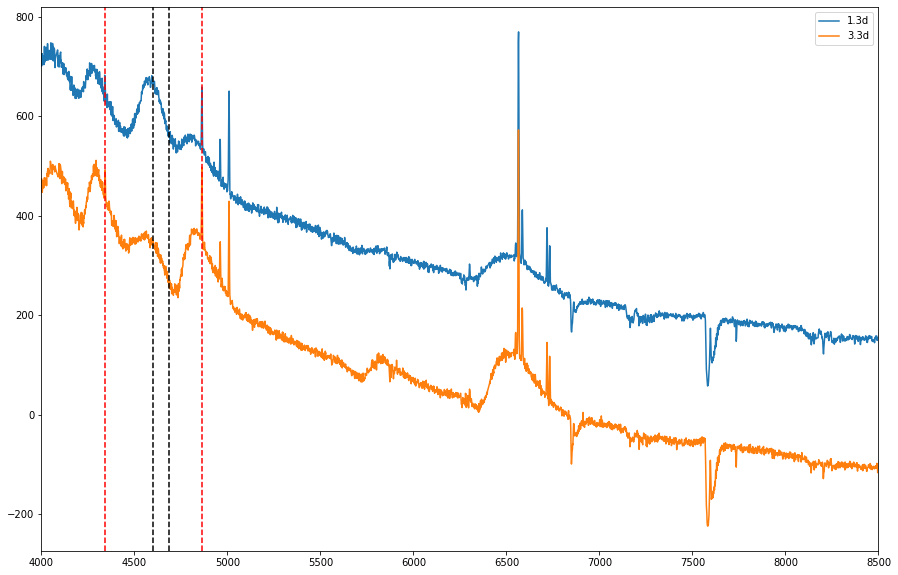

In [4]:
path = os.getcwd()
spec_path = path+'/spec/'
fig_path = path+'/figures/'
files = glob.glob(spec_path+'SN2021gmj-2021-03*fits')
files_tns = glob.glob(spec_path+'tns*')
print('files gathered: ',files)

def plotFlash():
    plt.axvline(x=4686,linestyle='--',color='black')
    plt.axvline(x=4600,linestyle='--',color='black')
    
    # h gamma & beta
    plt.axvline(x=4340,linestyle='--',color='red')
    plt.axvline(x=4861,linestyle='--',color='red')
    return

i = 0
plt.figure(figsize=(15,10))
for file in files:
    if 'tns' not in file:
        f = fits.open(file)
        date = f[0].header['DATE-OBS'].split('T')[0]
        mjd = round(Time(f[0].header['DATE-OBS']).mjd,1)
        phase = mjd-expd

        crval1 = f[0].header['CRVAL1']
        cdel = f[0].header['CD1_1']
        wave = np.array([crval1+i*cdel for i in range(len(f[0].data))]) / (1.0+z)
        flux = f[0].data
        plt.plot(wave,flux+i,label=str(round(phase,1))+'d')

        i -= 300
        
    

# plotting locations of flash features
plotFlash()

plt.xlim([4000,8500])
plt.legend()
plt.show()